In [2]:
# Check the current state of /root/.kaggle
!ls -la /root/

# If .kaggle is a file, remove it and create the directory
!rm -f /root/.kaggle
!mkdir -p /root/.kaggle

# Copy the kaggle.json file to the .kaggle directory
!cp kaggle.json /root/.kaggle/

# Change the permissions of the kaggle.json file to be read-only
!chmod 600 /root/.kaggle/kaggle.json

# Verify by listing datasets
!kaggle datasets list


total 68
drwx------ 1 root root 4096 May 20 11:56 .
drwxr-xr-x 1 root root 4096 May 20 11:56 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 May 16 13:43 .cache
drwx------ 4 root root 4096 May 16 13:43 .config
drwxr-xr-x 5 root root 4096 May 16 13:43 .ipython
drwx------ 1 root root 4096 May 16 13:43 .jupyter
drwxr-xr-x 2 root root 4096 May 20 11:56 .keras
drwx------ 3 root root 4096 May 16 13:14 .launchpadlib
drwxr-xr-x 1 root root 4096 May 16 13:43 .local
drwxr-xr-x 4 root root 4096 May 16 13:43 .npm
-rw-r--r-- 1 root root  161 Jul  9  2019 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf
-rw-r--r-- 1 root root  165 May 16 13:43 .wget-hsts
ref                                                              title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------------  -----

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:12<00:00, 141MB/s]
100% 1.06G/1.06G [00:12<00:00, 91.3MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
     label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))



In [9]:

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 108ms/step - loss: 1.3933 - accuracy: 0.5840 - val_loss: 0.7052 - val_accuracy: 0.6096
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5790 - accuracy: 0.7024 - val_loss: 0.5264 - val_accuracy: 0.7418
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5090 - accuracy: 0.7539 - val_loss: 0.4675 - val_accuracy: 0.7820
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4296 - accuracy: 0.8022 - val_loss: 0.4592 - val_accuracy: 0.7868
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3752 - accuracy: 0.8322 - val_loss: 0.5010 - val_accuracy: 0.7570
Epoch 6/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3144 - accuracy: 0.8624 - val_loss: 0.5443 - val_accuracy: 0.7960
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2502 - accuracy: 0.8946 - val_loss: 0.5310 - val_ac

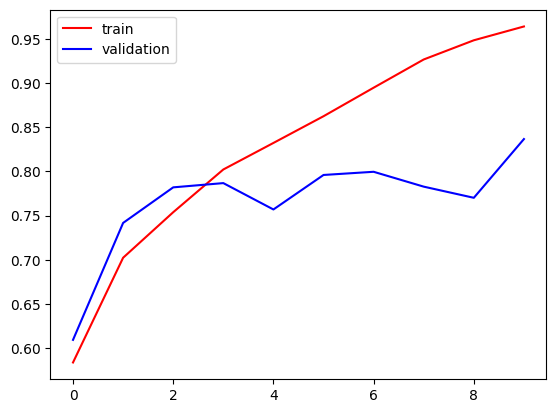

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

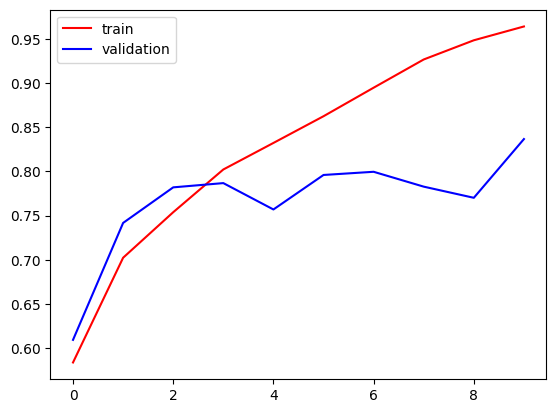

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

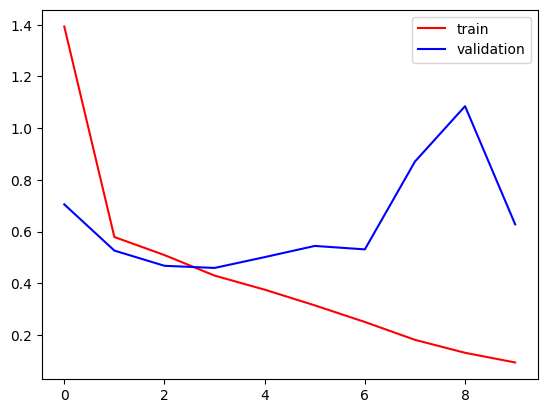

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

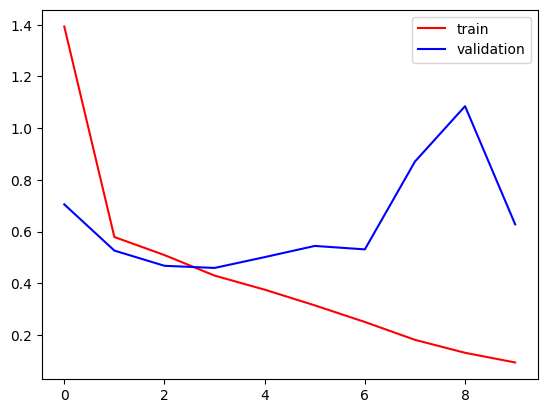

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [17]:
import cv2

In [20]:
test_img = cv2.imread('/content/cat.jpg')

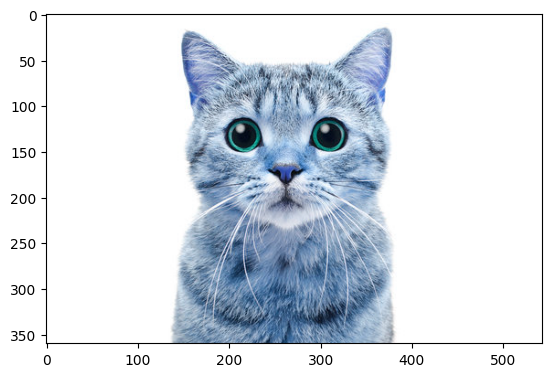

In [21]:
plt.imshow(test_img)

In [22]:
test_img.shape

(360, 543, 3)

In [23]:
test_img = cv2.resize(test_img,(256,256))

In [24]:
test_input = test_img.reshape((1,256,256,3))

In [25]:
model.predict(test_input)

1/1 [==============================] - 0s 440ms/step


array([[0.]], dtype=float32)

In [27]:
test_img1 = cv2.imread('/content/train/dogs/dog.0.jpg')

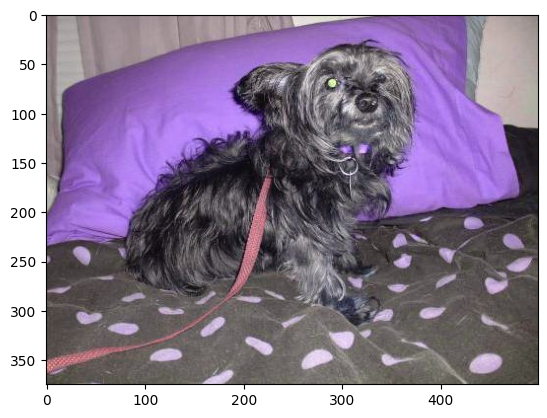

In [29]:
plt.imshow(test_img1)

In [30]:
test_img.shape

(375, 499, 3)

In [31]:
test_img = cv2.resize(test_img,(256,256))

In [32]:
test_input = test_img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 [==============================] - 0s 32ms/step


array([[1.]], dtype=float32)

In [34]:
model.save('dog_vs_cat_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
from google.colab import files
files.download('/content/dog_vs_cat_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>